# Mathematical Equations

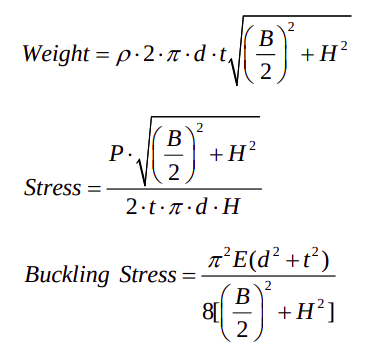

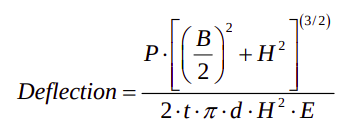

# Variables

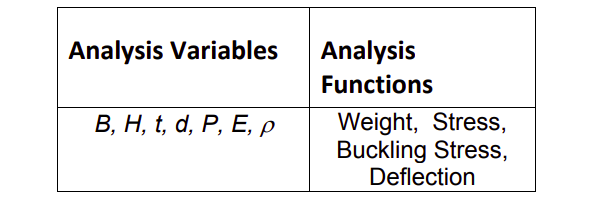

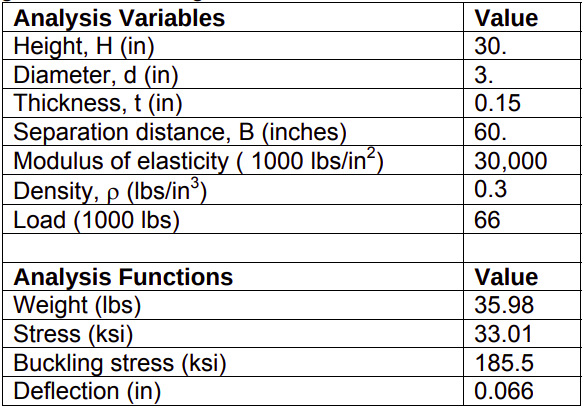


# SPECIFYING AN OPTIMIZATION PROBLEM

Find height and diameter to:
 Minimize Weight  
 s. t.  
 Stress ≤ 100  
(Stress-Buckling Stress) ≤ 0  
 Deflection ≤ 0.25

In [1]:
! pip install gekko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 46.6 MB/s eta 0:00:00


In [2]:
import numpy as np
from gekko import GEKKO

In [3]:
# create new model
m = GEKKO()

In [4]:
# declare model parameters
thickness = m.Param(value=0.15)
width = m.Param(value=60)
modulus = m.Param(value=30000)
density = m.Param(value=0.3)
load = m.Param(value=66)

In [5]:
# declare variables and initial guesses
height = m.Var(value=30.00,lb=10.0,ub=50.0)
diameter = m.Var(value=3.00,lb=1.0,ub=4.0)
weight = m.Var()

In [6]:
# intermediate variables with explicit equations
# these needs to be updated as we change height and diameter

leng = m.Intermediate(m.sqrt((width/2)**2 + height**2)) #length
area = m.Intermediate(np.pi * diameter * thickness)
iovera = m.Intermediate((diameter**2 + thickness**2)/8) # (I/A)
stress = m.Intermediate(load * leng / (2*area*height))
buckling = m.Intermediate(np.pi**2 * modulus * iovera / (leng**2))
deflection = m.Intermediate(load * leng**3/ (2 * modulus * area * height**2))

In [7]:
# implicit equations

m.Equation(weight==2*density*area*leng)
m.Equation(weight < 24)
m.Equation(stress < 100)
m.Equation(stress < buckling)
m.Equation(deflection < 0.25)

In [8]:
# objective function

m.Minimize(weight)

In [9]:
# solve optimization

m.solve()

apm 34.73.8.55_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :           12
   Intermediates:            6
   Connections  :            0
   Equations    :           12
   Residuals    :            6
 
 Number of state variables:              7
 Number of total equations: -            5
 Number of slack variables: -            4
 ---------------------------------------
 Degrees of freedom       :             -2
 
 * Warning: DOF <= 0
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

*****************************************************************************

In [10]:
print ('')
print ('--- Results of the Optimization Problem ---')
print ('Height: ' + str(height.value))
print ('Diameter: ' + str(diameter.value))
print ('Weight: ' + str(weight.value))


--- Results of the Optimization Problem ---
Height: [14.214892411]
Diameter: [1.6905737197]
Weight: [15.868275769]


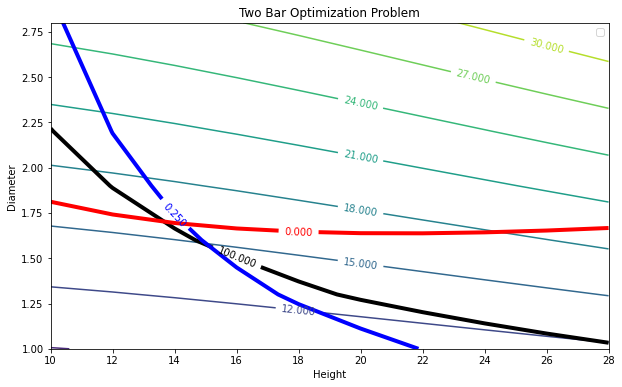

In [15]:
## Generate a contour plot

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Constants
pi = 3.14159
dens = 0.3
modu = 30000.0
load = 66.0

# Analysis variables
wdth = 60.0
thik = 0.15

# Design variables at mesh points
x = np.arange(10.0, 30.0, 2.0)
y = np.arange(1.0, 3.0, 0.3)
hght, diam = np.meshgrid(x, y)

# Equations and Constraints
leng = ((wdth/2.0)**2.0 + hght**2)**0.5
area = pi * diam * thik
iovera = (diam**2.0 + thik**2.0)/8.0
wght = 2.0 * dens * leng * area
strs = load * leng / (2.0 * area * hght)
buck = pi**2.0 * modu * iovera / (leng**2.0)
defl = load * leng**3.0 / (2.0*modu * area * hght**2.0)

# Create a contour plot

plt.figure(figsize = (10, 6))
# Weight contours
CS = plt.contour(hght, diam, wght)
plt.clabel(CS, inline=1, fontsize=10)

# Stress<100
CS = plt.contour(hght, diam, strs,[100.0],colors='k',linewidths=[4.0])
plt.clabel(CS, inline=1, fontsize=10)
# Deflection<0.25
CS = plt.contour(hght, diam, defl,[0.25],colors='b',linewidths=[4.0])
plt.clabel(CS, inline=1, fontsize=10)
# Stress-Buckling<0
CS = plt.contour(hght, diam, strs-buck,[0.0],colors='r',linewidths=[4.0])
plt.clabel(CS, inline=1, fontsize=10)
# Add some labels
plt.title('Two Bar Optimization Problem')
plt.xlabel('Height')
plt.ylabel('Diameter')

plt.show()